
#                 Sales Data Analysis

#### The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc of 12 months.
#### We are going to analyse this data using pandas and matplotlib

In [61]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Read the data or import the  data

In [62]:
data=pd.read_csv('Sales_data.csv')

### view our data

In [63]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Before we start analysing our data we should explore our data

In [64]:
data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Check the size of our data using .shape
###### It shows the total number of records/rows and columns in our dataset

In [65]:
data.shape

(186850, 6)

### .columns
#### It shows the name of the columns

In [66]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

###  .index to check  the indexing of our dataset
gives us the start and stop index of the dataset

In [67]:
data.index

RangeIndex(start=0, stop=186850, step=1)

### .nunique()
##### It shows the total no. of unique values in each column of the dataframe.It can be applied on the perticular column as well.

In [68]:
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

### How we can check which are those unique values? 

In [69]:
#product column has 20 unique products and to get those values we use vales count on column
data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

### check the data type of our data 
###### .info() gives all the information about the data 

In [70]:
data['Product'].dtype

dtype('O')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Is There Any missing values?

In [72]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [73]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [74]:
data.dropna(inplace=True)

###   Analysis 1: What was the best month for sales? How much was earned that month?

In [75]:
#data['Month']=data['Order Date'].str[0:2]
#data['Month'].astype('int32')

In [76]:
#there are some or in the date column we have to remove this or from the data
data=data[data['Order Date'].str[0:2] != 'Or']

In [77]:
data['Month']=data['Order Date'].str[0:2]
data['Month'].astype('int32')

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185950, dtype: int32

In [78]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [79]:
look_up={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
data['Month']=data['Month'].apply(lambda x: look_up[x])

In [80]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr


In [81]:
#data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [82]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('float')
data['Price Each']=data['Price Each'].astype('float')

In [83]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [84]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [85]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [86]:
highest_sales=data.groupby('Month').sum()

In [87]:
highest_sales.head()

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3367671.02,3390670.24
Aug,13448.0,2230345.42,2244467.88
Dec,28114.0,4588415.41,4613443.34
Feb,13449.0,2188884.72,2202022.42
Jan,10903.0,1811768.38,1822256.73


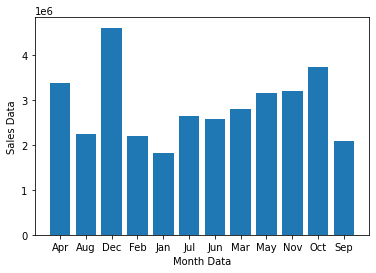

In [88]:
plt.figure()
plt.bar(highest_sales.index,highest_sales['Sales'])
plt.xlabel('Month Data')
plt.ylabel('Sales Data')
plt.show()

### Analysis 2:  What city sold the most product?

In [89]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [90]:
df='How,are,you'
df.split(',')

['How', 'are', 'you']

In [91]:
data['City']=data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [92]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [93]:
city_sold=data.groupby('City').sum()

In [94]:
city_sold.head()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2779908.20,2795498.58
Austin,11153.0,1809873.61,1819581.75
Boston,22528.0,3637409.77,3661642.01
Dallas,16730.0,2752627.82,2767975.40
Los Angeles,33289.0,5421435.23,5452570.80


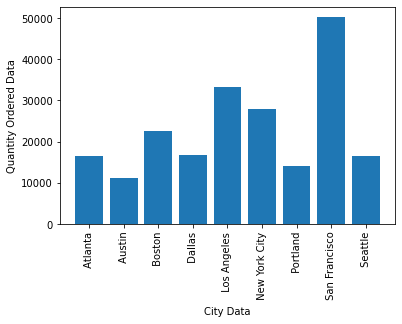

In [95]:
plt.show()
plt.bar(city_sold.index,city_sold['Quantity Ordered'])
plt.xticks(rotation=90)
plt.xlabel('City Data')
plt.ylabel('Quantity Ordered Data')
plt.show()

### Analysis 3: What time should we display advertisements to maximize likelihood of customer’s buying products?

In [96]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles


In [97]:
data['Time']=data['Order Date'].str[8:11]

In [98]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [99]:
time_data=data.groupby('Time').sum()

In [100]:
time_data.head()

,Quantity Ordered,Price Each,Sales
Time,,,
00,4428.0,709296.70,713721.27
01,2619.0,458490.00,460866.88
02,1398.0,233833.64,234851.44
03,928.0,144726.42,145757.89
04,937.0,162058.18,162661.01


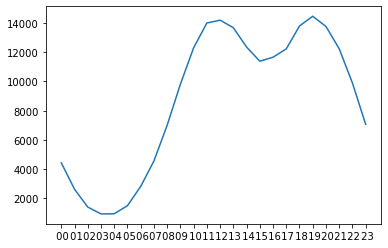

In [101]:
plt.show()
plt.plot(time_data.index,time_data['Quantity Ordered'])
plt.show()

### Analysis 4:  What Products are most often sold together?

In [102]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [103]:
duplicated_data=data[data['Order ID'].duplicated(keep=False)]

In [104]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11


In [105]:
duplicated_data['Product_bundle']=duplicated_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [106]:
duplicated_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [107]:
duplicated_data=duplicated_data[['Order ID','Product_bundle']].drop_duplicates()

In [108]:
duplicated_data.head()

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [109]:
from itertools import combinations
from collections import Counter

In [110]:
count=Counter()
for row in duplicated_data['Product_bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

###  Analysis 5: What product sold the most? Why do you think it did?

In [111]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [112]:
product_max=data.groupby('Product').sum()

In [113]:
product_max

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129.0,451068.99,454148.71
27in 4K Gaming Monitor,6244.0,2429637.70,2435097.56
27in FHD Monitor,7550.0,1125974.93,1132424.50
34in Ultrawide Monitor,6199.0,2348718.19,2355558.01
AA Batteries (4-pack),27635.0,79015.68,106118.40
AAA Batteries (4-pack),31017.0,61716.59,92740.83
Apple Airpods Headphones,15661.0,2332350.00,2349150.00
Bose SoundSport Headphones,13457.0,1332366.75,1345565.43
Flatscreen TV,4819.0,1440000.00,1445700.00


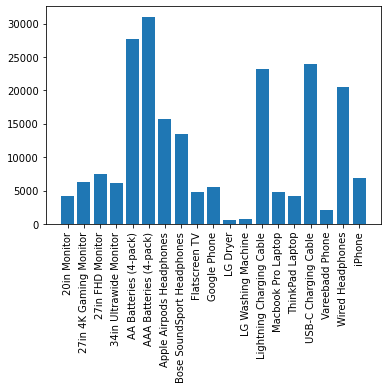

In [114]:
plt.figure()
plt.bar(product_max.index,product_max['Quantity Ordered'])
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

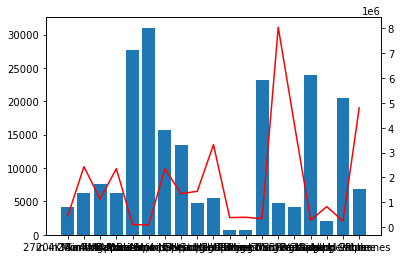

In [115]:
plt.figure()
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product_max.index,product_max['Quantity Ordered'])
plt.xticks(rotation=90)
ax2.plot(product_max.index,product_max['Sales'],color='r')
plt.show()